In [14]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt
import pandas as pd

weather_data = pd.read_csv('/weather_prediction_dataset.csv')

def make_sample(data, window):
    train = []
    target = []
    for i in range(len(data) - window):
        train.append(data[i:i+window])
        target.append(data[i+window])
    return np.array(train), np.array(target)

seq_data = []
for i in np.arange(0, 1000):
    seq_data += ([np.sin(np.pi * i * 0.01)])

X, y = make_sample(seq_data, 10)

Epoch 1/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0366
Epoch 2/100
31/31 [==============================] - 0s 942us/step - loss: 0.0208
Epoch 3/100
31/31 [==============================] - 0s 901us/step - loss: 0.0136
Epoch 4/100
31/31 [==============================] - 0s 837us/step - loss: 0.0095
Epoch 5/100
31/31 [==============================] - 0s 835us/step - loss: 0.0077
Epoch 6/100
31/31 [==============================] - 0s 863us/step - loss: 0.0068
Epoch 7/100
31/31 [==============================] - 0s 825us/step - loss: 0.0064
Epoch 8/100
31/31 [==============================] - 0s 823us/step - loss: 0.0059
Epoch 9/100
31/31 [==============================] - 0s 797us/step - loss: 0.0055
Epoch 10/100
31/31 [==============================] - 0s 791us/step - loss: 0.0051
Epoch 11/100
31/31 [==============================] - 0s 751us/step - loss: 0.0047
Epoch 12/100
31/31 [==============================] - 0s 747us/step - loss: 0.0043
Epoch 13/100
31

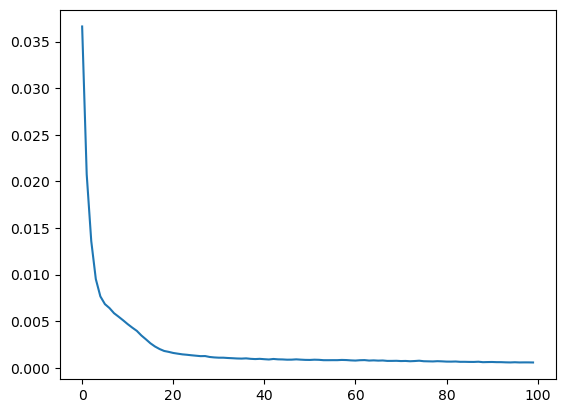

In [15]:
model = Sequential()
model.add(SimpleRNN(10, activation='tanh', input_shape=(10, 1)))
model.add(Dense(1, activation='tanh'))
model.compile(optimizer='adam', loss='mse')

history = model.fit(X, y, epochs=100,verbose=1)
plt.plot(history.history['loss'], label='loss')
plt.show()


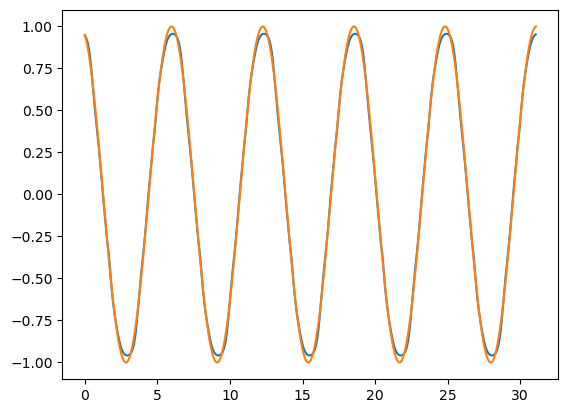

In [17]:
seq_data = []

for i in np.arange(0, 1000):
    seq_data += ([np.cos(np.pi * i * 0.01)])

X, y = make_sample(seq_data, 10)

y_pred = model.predict(X, verbose=0)

plt.plot(np.pi * np.arange(0, 990)*0.01, y_pred)
plt.plot(np.pi * np.arange(0, 990)*0.01, y)

plt.show()